In [15]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
import time
from scipy.integrate import solve_ivp

In [2]:
def pb02(x,k,ka,alpha1,alpha2,T,time_on_init,time_on_end):
    # x=[Y,Z] is the molecule count of each species.
    t_x=[0] # reaction time of fully-observed trajectory
    i=0
    # Reaction matrix.
    v=np.array([[1,0],[-1,0],[-1,0],[0,1],[0,-1],[0,-1]])
    while t_x[i]<T:
        # Propensity functions
        a = np.array([k, alpha1*x[i,0],ka*x[i,0]*x[i,1],k,alpha2*x[i,1],ka*x[i,0]*x[i,1]])
        sum_a=np.sum(a)
        #print("sum_a= ", sum_a)
        cumsum_a=np.cumsum(a,axis=0)
        # Draw 2 random numbers from U(0,1)
        epsilon=np.random.uniform(0,1,2)
        # Find the reaction that will take place next.
        #try:
         #   j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        #except ValueError:  
         #   pass
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        # Compute the time until reaction j happens.
        tau=(np.log(1/epsilon[1]))/sum_a
        # Update molecule counts due to reaction j happening.
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        #print("x= ", x)
        # Update time of simulation.
        t_x=np.append(t_x,[t_x[i]+tau])
        #print("t_x= ", t_x)
        i+=1
    return x,t_x

In [51]:
# Case 01:
k=10
ka=10**(-5)
alpha1=10**(-6)
alpha2=10**(-5)
x0=900
y0=90
x = np.array([x0,y0]).reshape(1,2)
T = 250
time_on_init = T//3
time_on_end = 2*T//3

for i in range(1):
    x,t_x = pb02(x,k,ka,alpha1,alpha2,T,time_on_init,time_on_end)
#     plt.plot(x,v[:,[0]]);
# plt.ylabel("Y")
# plt.xlabel("time");
import math
def fixed_point(k,ka,alpha1,alpha2):
    #y1=(-alpha2-math.sqrt(alpha2**2+4*ka*alpha2/alpha1))/(2*ka*alpha2/alpha1)
    y2=(-alpha2+math.sqrt(alpha2**2+4*ka*alpha2/alpha1))/(2*ka*alpha2/alpha1)
    c=alpha2/alpha1
    return [c*y2,y2]
print("Fixed points =", fixed_point(k,ka,alpha1,alpha2))

Fixed points = [999.5001249999924, 99.95001249999922]


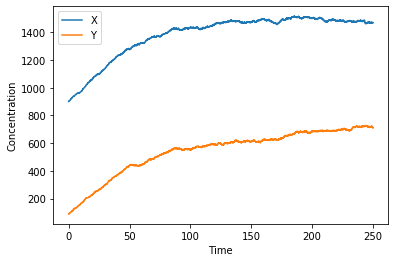

In [52]:
plt.plot(t_x,x[:,0],label='X')
plt.plot(t_x,x[:,1],label='Y')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.show()

In [53]:
def jac(x,y,k,ka,alpha1,alpha2):
    return [(-alpha1-ka*y)*(-alpha2-ka*x)-(ka**2)*x*y],[-alpha1-ka*y-alpha2-ka*x]
x,y=fixed_point(k,ka,alpha1,alpha2)
print("Det of the jacobian/ trace of Jacobian= ", jac(x,y,k,ka,alpha1,alpha2))

Det of the jacobian/ trace of Jacobian=  ([2.0000002499998918e-08], [-0.011005501374999917])


In [59]:
# Case 02:
k=10**3
ka=10**(-3)
alpha1=10**(-4)
alpha2=10**(-3)
x0=900
y0=90
x = np.array([x0,y0]).reshape(1,2)
T = 15
time_on_init = T//3
time_on_end = 2*T//3

for i in range(1):
    x,t_x = pb02(x,k,ka,alpha1,alpha2,T,time_on_init,time_on_end)
#     plt.plot(x,v[:,[0]]);
# plt.ylabel("Y")
# plt.xlabel("time");

Fixed point = [99.50124999218761, 9.950124999218762]


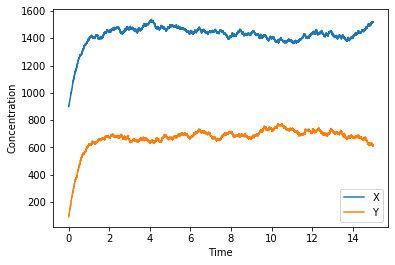

In [60]:
print("Fixed point =", fixed_point(k,ka,alpha1,alpha2))

plt.plot(t_x,x[:,0],label='X')
plt.plot(t_x,x[:,1],label='Y')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.show()

In [56]:
def jac(x,y,k,ka,alpha1,alpha2):
    return [(-alpha1-ka*y)*(-alpha2-ka*x)-(ka**2)*x*y],[-alpha1-ka*y-alpha2-ka*x]
x,y=fixed_point(k,ka,alpha1,alpha2)
print("Det of the jacobian/ trace of Jacobian= ", jac(x,y,k,ka,alpha1,alpha2))

Det of the jacobian/ trace of Jacobian=  ([2.0000249998437586e-05], [-0.11055137499140637])


In [42]:
# Both cases have stable fixed point.

In [ ]:
# We remark the two graphs are different.